<a href="https://colab.research.google.com/github/yexf308/AppliedStatistics/blob/main/4_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline 
import pandas as pd
from scipy import linalg
from itertools import combinations
import scipy

Populating the interactive namespace from numpy and matplotlib


$\def\m#1{\mathbf{#1}}$
$\def\mm#1{\boldsymbol{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
$\def\mr#1{\mathrm{#1}}$
$\newenvironment{rmat}{\left[\begin{array}{rrrrrrrrrrrrr}}{\end{array}\right]}$
$\newcommand\brm{\begin{rmat}}$
$\newcommand\erm{\end{rmat}}$
$\newenvironment{cmat}{\left[\begin{array}{ccccccccc}}{\end{array}\right]}$
$\newcommand\bcm{\begin{cmat}}$
$\newcommand\ecm{\end{cmat}}$



We have the training data $\{\m{x}^{(i)}, y^{(i)}\}_{i=1}^N$, where $y$ is the output response and $x_j$ is the $j$-th input feature. 

We assume the relationship between $y$ and $\m{x}$, (note $y$ is a random variable)
\begin{align}
y=f(\m{x})+\epsilon
\end{align}
$f$ is the fixed unknown function and $\epsilon$ is a random error term and is independent of $\m{x}$ and has mean zero. 

Say $\hat f$ is our estimate for $f$, and we have the prediction $\hat y = \hat f(\m{x})$. Assume $\hat f$ and $\m{x}$ are fixed, 
\begin{align}
\mb{E}[(y-\hat y)^2] &= \mb{E}[(f(\m{x})-\hat f(\m{x}))^2] \\
&=(f(\m{x})-\hat f(\m{x}))^2 +\text{Var}(\epsilon)
\end{align}
The first term is the **reducible error** and the second term is **irreducible error**. 
# Multiple Linear Regression
Assume the functional form or shape of $f$, here we assume $f$ is linear in $\m{x}$, i.e.,

\begin{align}
y = w_0 + w_1 x_1 + \dots + w_dx_d + \epsilon
\end{align}
$ w_0 $ is the intercept. We can absorb the intercept term $w_0$.

The **weights** vector $\m{w}=[w_0, w_1, \dots, w_d]^\top\in \mb{R}^{d+1}$ and the **feature** vector $\m{x}=[1, x_1, x_2, \dots, x_d]\in \mb{R}^{d+1}$. Then 
\begin{align}
y = \m{x}\m{w} +\epsilon
\end{align}

$\epsilon_i = y^{(i)}-\mathbf{x}^{(i)}\mathbf{w}$ is the residual error of $i$-th sample, and follows the Gaussian distrbution, $\c{N}(0, \sigma^2)$. 

## Least square estimation
After the linear model is selected, we uses the traning data to fit the model. Here we introduces the **least square estimation**. 

- Define the residue sum of squares (RSS), $\mm\epsilon = [\epsilon_1, \dots, \epsilon_N]$.
\begin{align}
\text{RSS}(\m{w}) &= \sum\epsilon_i^2=\|\mm\epsilon\|_2^2  \\
&=\sum_{i=1}^N (y^{(i)}-\mathbf{x}^{(i)}\mathbf{w})^2 \\
&=\|\mathbf{X}\mathbf{w}-\mathbf{y}\|_2^2 = (\mathbf{X}\mathbf{w}-\mathbf{y})^\top(\mathbf{X}\mathbf{w}-\mathbf{y})
\end{align}
where $\m{X}= \bcm \m{x}^{(1)} \\ \m{x}^{(2)} \\ \dots \\ \m{x}^{(N)}\ecm \in \mb{R}^{N\times (d+1)}$ and $\m{y}=\bcm y^{(1)} \\ y^{(2)}\\ \dots \\ y^{(N)}\ecm$. Usually in regression, we have $N\gg d+1$, then $\text{rank}(\mathbf{X})=d+1$ is of full rank very likely. 

- Mean squared error (MSE) is $\text{MSE}(\m{w}) = \frac{1}{N}\text{RSS}(\m{w})$. Root Mean squared error (RMSE) is $\text{RMSE}(\m{w})=\sqrt{\text{MSE}(\m{w})}$. 

- The gradient of RSS is 
$ \nabla \text{RSS}(\mathbf{w})=2(\mathbf{X}^\top\mathbf{X} \mathbf{w}-\mathbf{X}^\top\mathbf{y})$ (why?)
So to solve 
$$\mathbf{X}^\top\mathbf{X} \mathbf{w}=\mathbf{X}^\top\mathbf{y} $$
The ordinary least square solution is $\hat{\mathbf{w}}= (\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}$. 

- If $\mathbf{X}$ is full rank, the hessian of RSS$(\mathbf{w})$ is $\mathbf{X}^\top\mathbf{X}$ is Positive definite matrix and $\text{RSS}(\m{w})$ is a strictly convex function! The least square solution is unique. 


- The quantity $\mathbf{X}^\dagger = (\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top$ is the **left pseudo inverse** of the non-square matrix $\mathbf{X}$. 

- $\hat{\m{y}}$ is the predicted value $\hat{\m{y}}= \m{X}\hat{\m{w}} = \m{X}(\m{X}^\top\m{X})^{-1}\m{X}^\top \m{y}$.


- $\hat{\m{w}}$ is MLE as well. Proof: 
   - The linear model can be written as $p(y|\m{x},\theta)= \c{N}(y|\m{x}\m{w}, \sigma^2)$, where $\theta = (\m{w},\sigma^2)$. We assume $\sigma$ is fixed. 

   - The NLL is 
   \begin{align}
   \text{NLL}(\m{w})= -\sum_{i=1}^N \log \left[(2\pi\sigma^2)^{-1/2}\exp\left(-\frac{(y^{(i)}-\m{x}^{(i)}\m{w})^2}{2\sigma^2}\right)\right] = C_1 + C_2\sum_{i=1}^N (y^{(i)}-\m{x}^{(i)}\m{w})^2
   \end{align}  

  - Minmizing NLL is equivalent with minimizing RSS.  



## Geometric interpretation 

Minimizing RSS becomes the following geometry problem: find a vector $\hat{\m{y}}$ lies in the linear subspace spanned by $\m{X}$ and is as close as possible to $\m{y}$, i.e.,
\begin{align}
\text{argmin}_{\hat{\m{y}}\in \text{span}(\m{X})} \|\m{y}-\hat{\m{y}}\|_2
\end{align}

### Orthognal projection
Define the projection matrix $P=\m{X}(\m{X}^\top\m{X})^{-1}\m{X}^\top$ (verify the definition) and $\text{span}(P)=\text{span}(\m{X})$, then $\m{\hat{y}}$ is projected value of $\m{y}$ onto the $\text{span}(\m{X})$: $\hat{\m y}=P \m{y}$. 



Note $\m{X}^\top (\m{y}-\hat{\m{y}})=0$, so the residual vector to be orthogonal to the span$(\mathbf{X})$.


<img src="https://github.com/yexf308/MAT592/blob/main/image/11.3.png?raw=true" width="600" />

## Algorithm 
It is to solve the linear system, $Ax=b$, where $A = \mathbf{X}^\top\mathbf{X}$ and $b= \mathbf{X}^\top\mathbf{y}$.
- Naive way: ```np.linalg.inv(X.T @ X) @ X.T @ y```

- Pseudo-inverse(SVD): ```np.dot(np.linalg.pinv(X), y)```

- lstsq(SVD-based solver): ```np.linalg.lstsq(X, y, rcond=None)[0] ```

- QR decomposition:
   ```
   def qr_solve_over(X, y):
    Q, R = np.linalg.qr(X)
    Qy = np.dot(Q.T, y)
    return scipy.linalg.solve_triangular(R, Qy)
   ```


Let's test with a tall near singular matrix 


In [2]:

def naive_solve(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y




def qr_solve(X, y):
    Q, R = np.linalg.qr(X)
    Qy = np.dot(Q.T, y)
    return scipy.linalg.solve_triangular(R, Qy)



def run_demo(m, n):
    print("Solving linear system with {} constraints and {} unknowns".format(m, n))
    np.random.seed(0)
    A = np.random.rand(m, n)
    A[:,n-1]= np.sum(A[:,0:n-1],axis=1)
    A = A +np.random.rand(m, n)*0.000001

    b = np.random.rand(m, 1)

    methods = list()
    solns = list()

    %%time
    methods.append("naive")
    solns.append(naive_solve(A, b))
    
    %%time
    methods.append("pinv")
    solns.append(np.dot(np.linalg.pinv(A), b))

    %%time
    methods.append("lstsq")
    solns.append(np.linalg.lstsq(A, b, rcond=None)[0])
    
    %%time
    methods.append("qr")
    solns.append(qr_solve(A, b))

    for (method, soln) in zip(methods, solns):
        residual = b - np.dot(A, soln)
        print(
            "method {}, norm {:0.5f}, residual {:0.5f}".format(method, np.linalg.norm(soln), np.linalg.norm(residual))
        )


In [ ]:
m = 5000000
n = 20  # Overdetermined
run_demo(m, n)

- Accuracy: pinv = lstsq = qr > naive
- Time: lstsq > pinv > qr

So for tall matrix ($N>d$), QR method is the best: quicker and accurate. 

In fact, for fat matrix ($N< d$), SVD method will be the best. 

## Synthetical data


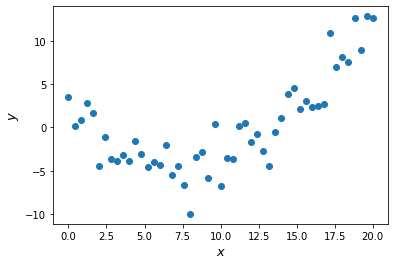

In [3]:
import plotly.graph_objects as go

np.random.seed(0)

N = 51
x = np.linspace(0.0, 20, N)
X0 = x.reshape(N, 1)
X = np.c_[np.ones((N, 1)), X0]
w = np.array([-1.5, 1 / 9.0])
y = w[0] * x + w[1] * np.square(x)
y = y + np.random.normal(0, 1, N) * 2


fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x, y)
ax.set_xlabel('$x$', fontsize=13)
ax.set_ylabel('$y$', fontsize=13)
plt.show()


In [4]:
# the most straightforward way to solve the least square. 
# w = np.linalg.lstsq(X, y, rcond=None)[0]
w = qr_solve(X, y)


W0, W1 = np.meshgrid(np.linspace(-15, 7, 300), np.linspace(-1.5, 2.5, 200))
SS = np.array([sum((w0 * X[:, 0] + w1 * X[:, 1] - y) ** 2) for w0, w1 in zip(np.ravel(W0), np.ravel(W1))])
SS = SS.reshape(W0.shape)

fig = go.Figure(data=[go.Surface(z=SS, x=W0, y=W1)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))


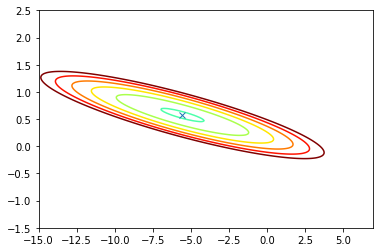

In [5]:
fig, ax = plt.subplots()
CS = plt.contour(W0, W1, SS, levels=np.linspace(0, 2000, 10), cmap="jet")
plt.plot(w[0], w[1], "x")
plt.show()

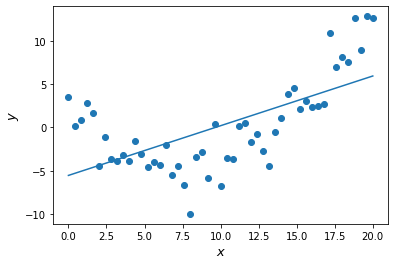

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x, y)
ax.plot(x, w[0]+w[1]*x)
ax.set_xlabel('$x$', fontsize=13)
ax.set_ylabel('$y$', fontsize=13)
plt.show()

## Nonlinear Relationships
 In general a straight line will not provide a good fit to most datasets. We can apply a nonlinear transformation to the input features, by replacing $x$ with $\phi(x)$ to get
$$p(y|x, \theta) = \mathcal{N}(y|\phi(x)\mathbf{w}, \sigma^2) $$
As long as $\phi$ is fixed, the model remains linear in the parameter. One possible choice is to use a polynomial expansion of degree $d$. Now $d$ is the parameter. 
\begin{align}
\phi(x) = [1, x, x^2, \dots, x^d ]
\end{align}
But now the question is how to choose the parameter $d$?
- small $d$: Underfitting, the predicted value deviate from observed value a lot. 
- Large $d$: Overfitting, it cannot generalize to future dataset. 



### Overfitting and Holding out
Fit our regression methods on training dataset $\{\m{x}^{(i)}, y^{(i)}\}_{i=1}^N$ and compute predicted value $\hat f(\m{x}^{(i)})$. If these predicted values are approximately equal to $y^{(i)}$, then RSS/MSE/NLL will be small. But we are not interested in whether $\hat f(\m{x}^{(i)}) \approx y^{(i)}$. Instead we want to know whether $f(\m{x}^{(0)})$ is equal to $y^{(0)}$, where $\{f(\m{x}^{(0)}), y^{(0)}\}$ is previously unseen test observation not used to train the model. 

**Goal**: to choose the method gives the lowest test MSE, rather than the lowest training MSE. If we had a large number of test data, we want to minmize $\mb{E}[(y^{(0)}-\hat f(\m{x}^{(0)}))^2]$

**Method:** Holding out! Denote the ERM as $R_d(\mm\theta, \c{D})=\frac{1}{|\c{D}|}\sum_{\c{D}}\ell(\m{y}, f_d(\m{x};\mm\theta))$. 

- Partition the data into two disjoint sets, the training set $\c{D}_{\text{train}}$ and the testing(validation) set $\c{D}_{\text{test}}$, $\c{D}=\c{D}_{\text{test}} \cup \c{D}_{\text{train}}$. Usually, 80\% of data for the training and 20\% of data for the testing. 


- Fit the model on $\c{D}_{\text{train}}$ and evaluate its performance on $\c{D}_{\text{test}}$.

 - Compute the parameter estimate 
  \begin{align}
  \hat{\mm\theta}_d(\c{D}_{\text{train}}) = \arg\min_{\mm\theta} R_d(\mm\theta, \c{D}_{\text{train}}) 
  \end{align}

 - Compute the testing error
 \begin{align}
 R_d^{\text{val}} = R_d(\hat{\mm\theta}_d(\c{D}_{\text{train}}), \c{D}_{\text{test}})
 \end{align}


- Choose the value of parameter $d$ that results in the best validation performance.
\begin{align}
d^* = \arg\min_{d} R_{d}^{\text{val}}
\end{align}

- (Maybe not necessary)Pick $d^*$, and refit the model to the entire dataset $\c{D}$.
\begin{align}
\hat{\mm\theta}^*=\arg\min_{\mm\theta}R_{d^*}(\mm\theta, \c{D}). 
\end{align}


There are many other methods, such as cross-validation. We will talk about it later. 



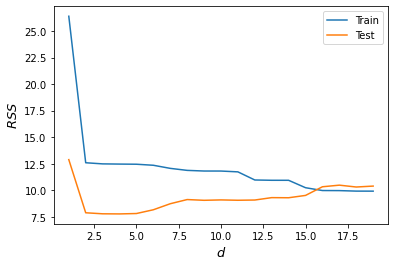

In [7]:
# for simplicity, use train_test_split function in sklearn. You can write your own 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

d_span = np.arange(1,20)

# hold out validation
N_train        = len(x_train)
X0             = x_train.reshape(N_train, 1)
X_train        = np.ones((N_train, 1))

N_test        = len(x_test)
X1            = x_test.reshape(N_test, 1)
X_test        = np.ones((N_test, 1))

w_store       = []
RSS_train     = []
RSS_test      = []

for d in d_span:
  X_train = np.hstack([X_train, X0**d])
  X_test  = np.hstack([X_test,  X1**d])
  w       = qr_solve(X_train, y_train)
  w_store.append(w)
  y_train_hat = X_train.dot(w)
  y_test_hat = X_test.dot(w)
  RSS_train.append(norm(y_train-y_train_hat))
  RSS_test.append(norm(y_test-y_test_hat))



fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(d_span, RSS_train)
ax.plot(d_span, RSS_test)
ax.set_xlabel('$d$', fontsize=13)
ax.set_ylabel('$RSS$', fontsize=13)
ax.legend(['Train', 'Test'])
plt.show()



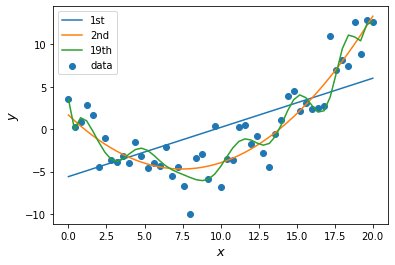

In [8]:
d_plot_span = [1,2,19]
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x,y)

N        = len(x)
X0       = x.reshape(N, 1)

for d in d_plot_span:
  X        = np.ones((N, 1))
  for i in range(1,d+1):
    X   = np.hstack([X, X0**i])

  y_hat = X.dot(w_store[d-1])
  ax.plot(x, y_hat)

ax.set_xlabel('$x$', fontsize=13)
ax.set_ylabel('$y$', fontsize=13)
ax.legend(['1st','2nd','19th','data'])
plt.show()



It shows very clearly 2nd order polynormial fits the best. 


### Additional tests!

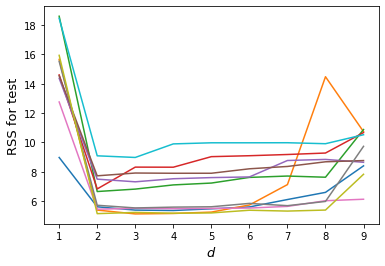

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))

for i in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

  d_span = np.arange(1,10)

  # hold out validation
  N_train        = len(x_train)
  X0             = x_train.reshape(N_train, 1)
  X_train        = np.ones((N_train, 1))

  N_test        = len(x_test)
  X1            = x_test.reshape(N_test, 1)
  X_test        = np.ones((N_test, 1))

  w_store       = []
  RSS_train     = []
  RSS_test      = []

  for d in d_span:
    X_train = np.hstack([X_train, X0**d])
    X_test  = np.hstack([X_test,  X1**d])
    w       = qr_solve(X_train, y_train)
    w_store.append(w)
    y_train_hat = X_train.dot(w)
    y_test_hat = X_test.dot(w)
    RSS_train.append(norm(y_train-y_train_hat))
    RSS_test.append(norm(y_test-y_test_hat))

  ax.plot(d_span, RSS_test)



ax.set_xlabel('$d$', fontsize=13)
ax.set_ylabel('RSS for test', fontsize=13)
plt.show()


All ten
curves indicate that the model with a quadratic term has a dramatically
smaller testing set RSS than the model with only a linear term. Furthermore,
all ten curves indicate that there is not much benefit in including
cubic or higher-order polynomial terms in the model. But it is worth noting
that each of the ten curves results in a different test RSS estimate for each
of the ten regression models considered. And there is no consensus among
the curves as to which model results in the smallest testing set RSS.
Based on the variability among these curves, all that we can conclude with
any confidence is that the linear fit is not adequate for this data.

- the validation estimate
of the test error rate can be highly variable, depending on precisely
which observations are included in the training set and which
observations are included in the testing set.

- In the validation approach, only a subset of the observations—those
that are included in the training set rather than in the testing
set are used to fit the model. Since statistical methods tend to perform
worse when trained on fewer observations, this suggests that the
testing set error rate may tend to overestimate the test error rate
for the model fit on the entire data set.